In [81]:
import numpy as np

def adaptive_thresh(input_img):

    h, w, k = input_img.shape

    S = w/8
    s2 = S/2
    T = 15.0

    #integral img
    int_img = np.zeros_like(input_img, dtype=np.uint32)
    for l in range(k):
        for col in range(w):
            for row in range(h):
                int_img[row, col, l] = input_img[0:row,0:col,0:l].sum()

    #output img
    out_img = np.zeros_like(input_img)    

    for l in range(k):
        for col in range(w):
            for row in range(h):
                #SxS region
                y0 = int(max(row-s2, 0))
                y1 = int(min(row+s2, h-1))
                x0 = int(max(col-s2, 0))
                x1 = int(min(col+s2, w-1))

                count = (y1-y0)*(x1-x0)

                sum_ = int_img[y1, x1, l]-int_img[y0, x1, l]-int_img[y1, x0, l]+int_img[y0, x0, l]

                if input_img[row, col, l]*count < sum_*(100-T)/100:
                    out_img[row,col, l] = 0
                else:
                    out_img[row,col, l] = 255

    return out_img

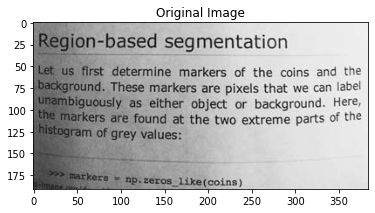

In [78]:
#reading the image
import cv2
import matplotlib.pyplot as plt
a = cv2.imread("Image/page.png")

#showing the original image
plt.title("Original Image")
plt.imshow(a)
plt.show()


In [83]:
out_img = adaptive_thresh(a)

C:\Users\Admin\AppData\Local\Temp/ipykernel_1848/534162543.py:32: RuntimeWarning: overflow encountered in ulong_scalars
  sum_ = int_img[y1, x1, l]-int_img[y0, x1, l]-int_img[y1, x0, l]+int_img[y0, x0, l]


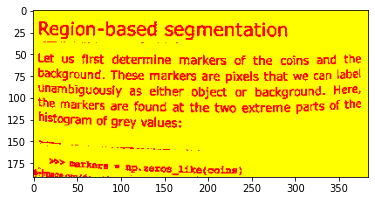

In [84]:
# out_img
plt.imshow(out_img, cmap='gray')
plt.show()